# Fashion MNIST

In [31]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
print("학습 데이터", X_train.shape, y_train.shape)
print("테스트 데이터", X_test.shape, y_test.shape)

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
print("학습 데이터", X_train.shape, y_train.shape)
print("검증 데이터", X_valid.shape, y_valid.shape)

학습 데이터 (60000, 28, 28) (60000,)
테스트 데이터 (10000, 28, 28) (10000,)
학습 데이터 (48000, 28, 28) (48000,)
검증 데이터 (12000, 28, 28) (12000,)


In [32]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [33]:
print(y_train[0], class_names[y_train[0]])

7 Sneaker


In [34]:
print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

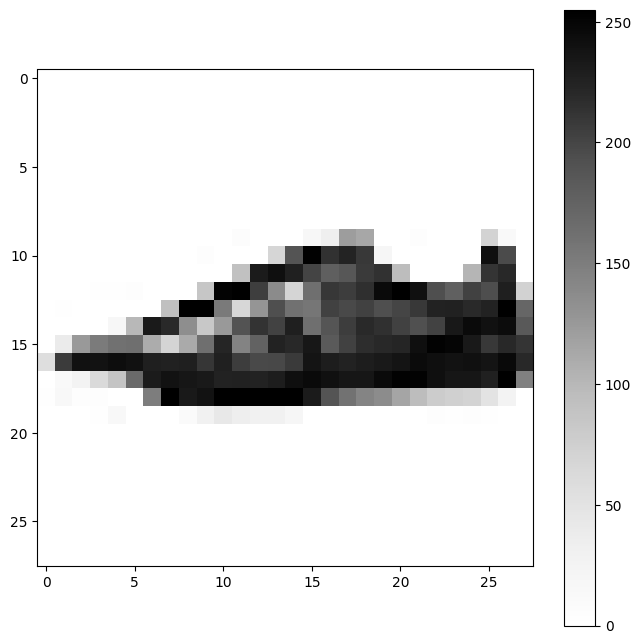

In [35]:
import matplotlib.pyplot as plt
# plt.style.use("seaborn-white")
plt.figure(figsize=(8, 8))
plt.imshow(X_train[0], cmap="Greys")
plt.colorbar()
plt.show()

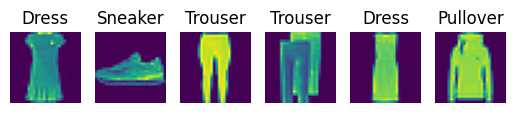

In [36]:
import numpy as np

index = np.random.randint(low=0, high=48000, size=6)

for i, idx in enumerate(index):
    ax = plt.subplot(1, len(index), i+1)
    ax.imshow(X_train[idx])
    label = class_names[y_train[idx]]
    ax.set_title(label)
    ax.axis("off")
    


## 데이터 전처리

In [37]:
X_train.shape, X_valid.shape, X_test.shape

((48000, 28, 28), (12000, 28, 28), (10000, 28, 28))

In [38]:
X_train = X_train.reshape(-1, 28 * 28)
X_valid = X_valid.reshape(-1, 28 * 28)
X_test = X_test.reshape(-1, 28 * 28)

X_train.shape, X_valid.shape, X_test.shape

((48000, 784), (12000, 784), (10000, 784))

In [39]:
print(X_train[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   

In [40]:
X_train = X_train / 255.
X_valid = X_valid / 255.
X_test = X_test / 255.

X_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

## 모델 구성

In [41]:
from tensorflow.keras import layers, models

model = models.Sequential()
model.add(layers.Input(shape=(784,)))
model.add(layers.Dense(512, activation="sigmoid"))
model.add(layers.Dense(10, activation="softmax"))
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 407,050 (1.55 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

## 모델 컴파일 및 학습

In [43]:
model.compile(loss=tf.losses.SparseCategoricalCrossentropy(),
              optimizer="Adam",
              metrics=["accuracy"])

In [44]:
history = model.fit(X_train, y_train, 
                    validation_data=(X_valid, y_valid), 
                    epochs=60, 
                    batch_size=64)

Epoch 1/60
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7551 - loss: 0.7214 - val_accuracy: 0.8315 - val_loss: 0.4590
Epoch 2/60
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8439 - loss: 0.4274 - val_accuracy: 0.8582 - val_loss: 0.3909
Epoch 3/60
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8638 - loss: 0.3775 - val_accuracy: 0.8662 - val_loss: 0.3739
Epoch 4/60
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8690 - loss: 0.3559 - val_accuracy: 0.8679 - val_loss: 0.3660
Epoch 5/60
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8790 - loss: 0.3349 - val_accuracy: 0.8711 - val_loss: 0.3455
Epoch 6/60
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8856 - loss: 0.3122 - val_accuracy: 0.8794 - val_loss: 0.3337
Epoch 7/60
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8955 - loss: 0.2860 - val_accuracy: 0.8764 - val_loss: 0.3395
Epoch 8/60
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8964 - loss: 0.2788 - val_accuracy: 0.

In [57]:
def show_history(history):
    history_dict = history.history
    
    loss = history_dict["loss"]
    val_loss = history_dict["val_loss"]

    epochs = range(1, len(loss) + 1)
    
    fig = plt.figure(figsize=(12, 5))

    ax_loss  = fig.add_subplot(1, 2, 1)
    ax_loss.plot(epochs, loss, "b-", label="train_loss")
    ax_loss.plot(epochs, val_loss, "r-", label="valid_loss")
    ax_loss.set_title("Train and Validation Loss")
    ax_loss.set_xlabel("Epochs")
    ax_loss.set_ylabel("Loss")
    ax_loss.grid()
    ax_loss.legend()
    
    accuracy = history_dict["accuracy"]
    val_accuracy = history_dict["val_accuracy"]

    ax_acc  = fig.add_subplot(1, 2, 2)
    ax_acc.plot(epochs, accuracy, "b-", label="train_loss")
    ax_acc.plot(epochs, val_accuracy, "r-", label="valid_loss")
    ax_acc.set_title("Train and Validation Loss")
    ax_acc.set_xlabel("Epochs")
    ax_acc.set_ylabel("Loss")
    ax_acc.grid()
    ax_acc.legend()
    
    plt.show()

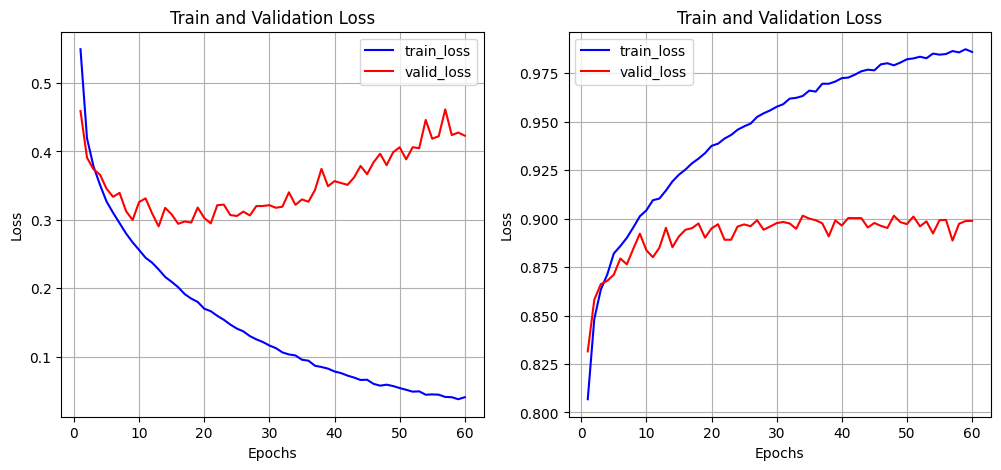

In [56]:
show_history(history)

## 모델 평가 및 예측

In [58]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 676us/step - accuracy: 0.8872 - loss: 0.4870


[0.4804123044013977, 0.8873999714851379]

In [59]:
y_pred = model.predict(X_test)
print(y_pred[5])

arg_y_pred = np.argmax(y_pred, axis=1)
print(arg_y_pred[5])
print(class_names[arg_y_pred[5]])

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 626us/step
[2.54508432e-08 1.00000000e+00 7.61556616e-13 1.71355652e-10
 1.35406226e-13 1.86027528e-21 1.91963156e-09 1.83213599e-18
 1.24164045e-17 4.51851675e-20]
1
Trouser


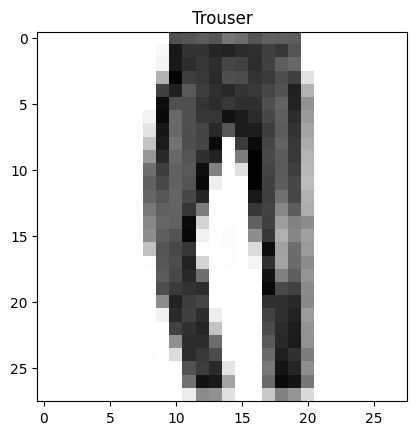

In [63]:
plt.imshow(X_test[5].reshape(28, 28), cmap="Greys")
plt.title(class_names[arg_y_pred[5]])
plt.show()

In [80]:
def plot_image(i, y_pred, y_test, img):
    y_pred, y_test, img = y_pred[i], y_test[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(y_pred)
    if predicted_label == y_test:
        color = "blue"
    else:
        color = "red"
    pred_class = class_names[predicted_label]
    percentage = 100*np.max(y_pred)
    label_class = class_names[y_test]
    plt.xlabel(f"{pred_class} {percentage:2.0f}% ({label_class})",
            color=color)
    


In [66]:
def plot_class(i, y_pred, y_test):
    y_pred, y_test = y_pred[i], y_test[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.ylim([0, 1])
    predicted_label = np.argmax(y_pred)

    plot = plt.bar(range(10), y_pred, color="darkgray")
    plot[predicted_label].set_color("red")
    plot[y_test].set_color("blue")

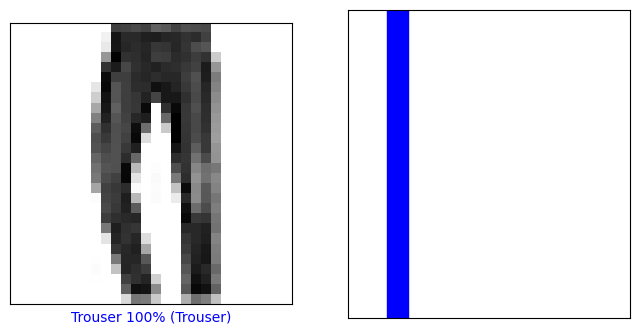

In [81]:
i = 5
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plot_image(i, y_pred, y_test, X_test.reshape(-1, 28, 28))
plt.subplot(1, 2, 2)
plot_class(i, y_pred, y_test)
plt.show()

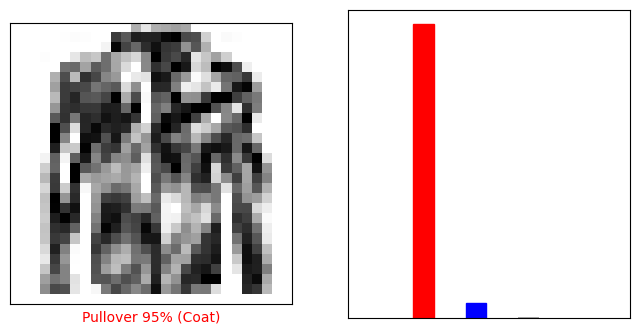

In [85]:
i = 17
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plot_image(i, y_pred, y_test, X_test.reshape(-1, 28, 28))
plt.subplot(1, 2, 2)
plot_class(i, y_pred, y_test)
plt.show()

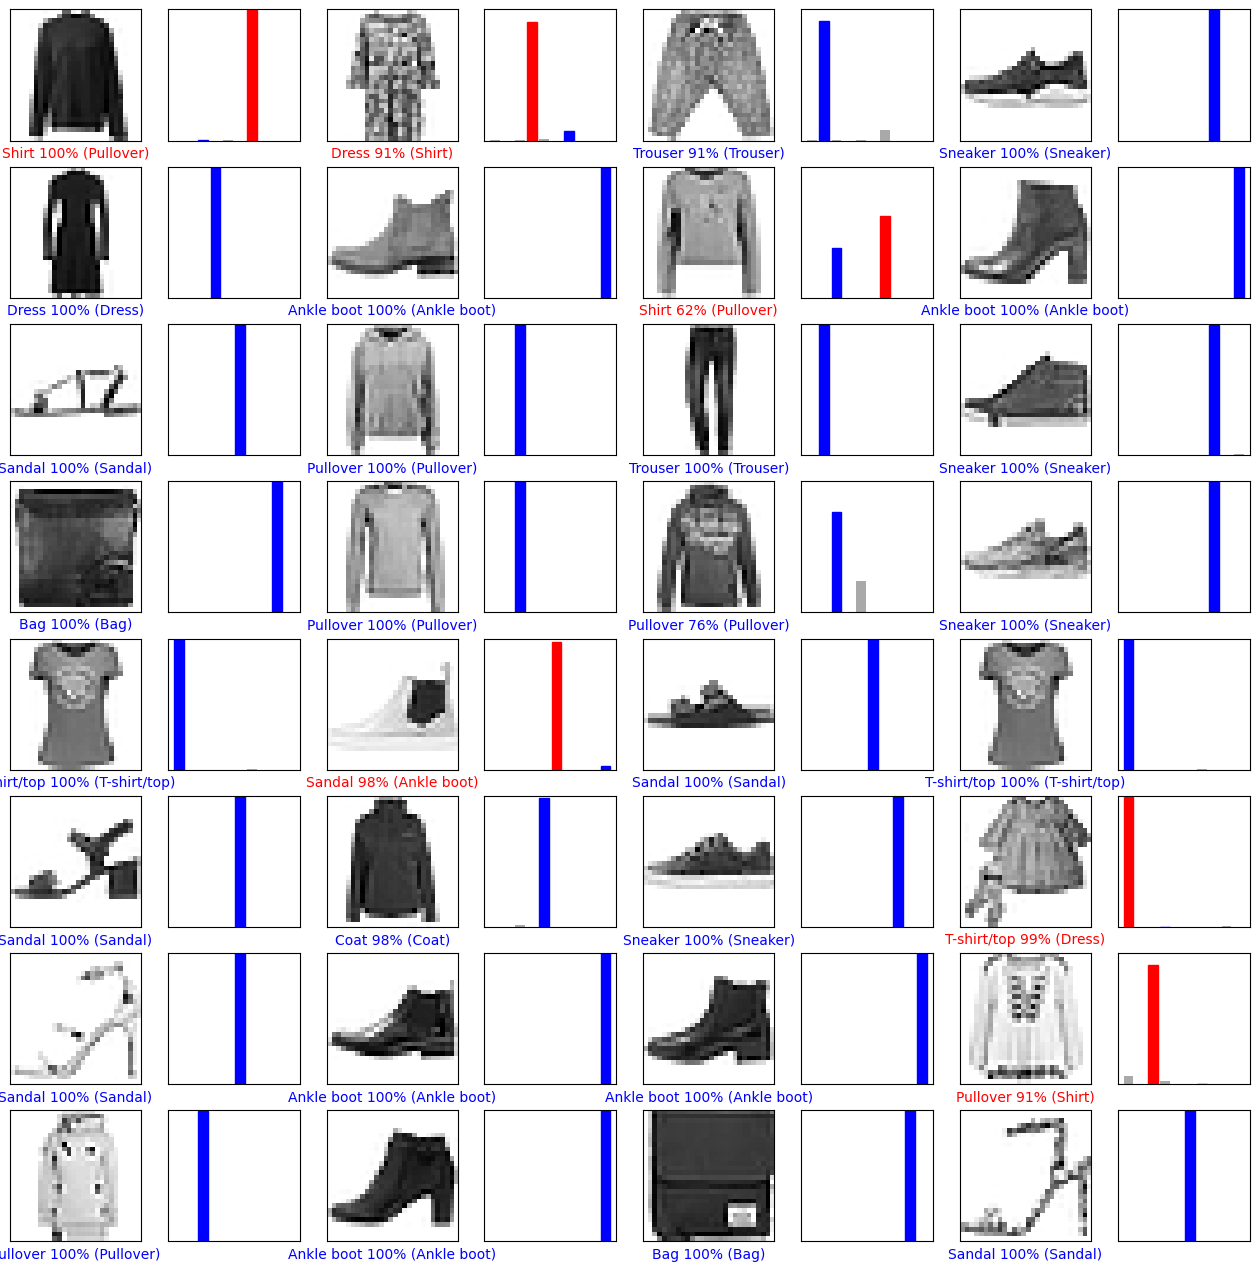

In [87]:
num_rows = 8
num_cols = 4
num_images = num_rows * num_cols

random_num = np.random.randint(10000, size=num_images)
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for idx, num in enumerate(random_num):
    plt.subplot(num_rows, 2 * num_cols, 2 * idx + 1)
    plot_image(num, y_pred, y_test, X_test.reshape(-1, 28, 28))
    plt.subplot(num_rows, 2 * num_cols, 2 * idx + 2)
    plot_class(num, y_pred, y_test)
plt.show()

In [88]:
from tensorflow.keras import utils
from sklearn.metrics import classification_report

y_test_cat = utils.to_categorical(y_test)
print(classification_report(np.argmax(y_test_cat, axis=1),
                            np.argmax(y_pred, axis=1),
                            target_names=class_names))

              precision    recall  f1-score   support

 T-shirt/top       0.83      0.83      0.83      1000
     Trouser       0.99      0.98      0.98      1000
    Pullover       0.83      0.79      0.81      1000
       Dress       0.91      0.87      0.89      1000
        Coat       0.81      0.81      0.81      1000
      Sandal       0.98      0.95      0.97      1000
       Shirt       0.67      0.76      0.71      1000
     Sneaker       0.95      0.96      0.95      1000
         Bag       0.98      0.96      0.97      1000
  Ankle boot       0.95      0.97      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



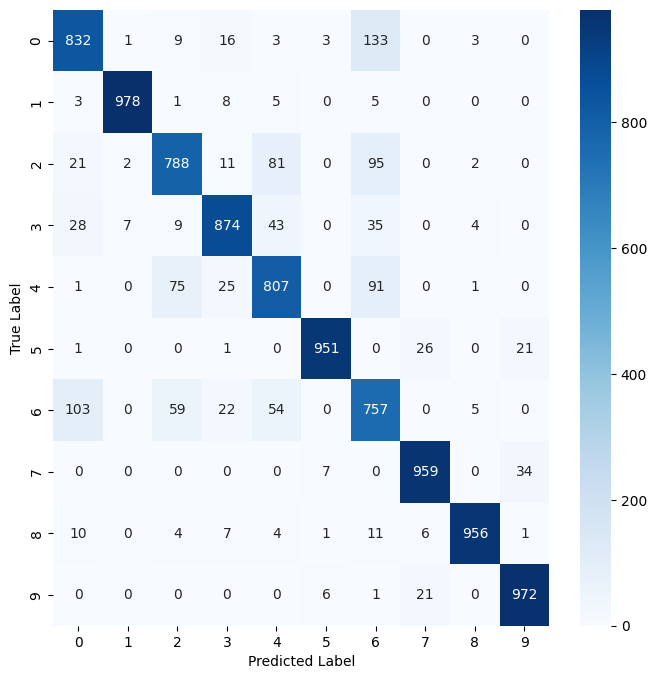

In [91]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(8, 8))
cm2 = confusion_matrix(np.argmax(y_test_cat, axis=1),
                       np.argmax(y_pred, axis=1))
sns.heatmap(cm2, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()